LINK DATASET : https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images/

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d shreyapmaher/fruits-dataset-images

 91% 187M/205M [00:01<00:00, 138MB/s]
100% 205M/205M [00:01<00:00, 157MB/s]


In [5]:
!unzip fruits-dataset-images.zip -d dataset_directory

Archive:  fruits-dataset-images.zip
  inflating: dataset_directory/images/apple fruit/Image_1.jpg  
  inflating: dataset_directory/images/apple fruit/Image_10.jpg  
  inflating: dataset_directory/images/apple fruit/Image_11.jpg  
  inflating: dataset_directory/images/apple fruit/Image_12.jpg  
  inflating: dataset_directory/images/apple fruit/Image_13.png  
  inflating: dataset_directory/images/apple fruit/Image_14.png  
  inflating: dataset_directory/images/apple fruit/Image_15.jpg  
  inflating: dataset_directory/images/apple fruit/Image_16.jpg  
  inflating: dataset_directory/images/apple fruit/Image_17.jpeg  
  inflating: dataset_directory/images/apple fruit/Image_18.jpg  
  inflating: dataset_directory/images/apple fruit/Image_19.jpg  
  inflating: dataset_directory/images/apple fruit/Image_2.jpg  
  inflating: dataset_directory/images/apple fruit/Image_20.jpg  
  inflating: dataset_directory/images/apple fruit/Image_21.jpg  
  inflating: dataset_directory/images/apple fruit/Image

In [7]:
!unzip /content/fruits-dataset-images.zip -d fruit_dataset

Archive:  fruits-dataset-images.zip
replace fruit_dataset/images/apple fruit/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [9]:
path = '/content/dataset_directory/images'

In [10]:
import os

In [11]:
kategori = os.listdir(path)
kategori

['cherry fruit',
 'grapes fruit',
 'banana fruit',
 'strawberry fruit',
 'apple fruit',
 'orange fruit',
 'kiwi fruit',
 'chickoo fruit',
 'mango fruit']

## Mengatur path dataset menjadi 3 train, val, test

In [12]:
train_dir = '/content/dataset_directory/images'
validation_dir = '/content/dataset_directory/images'
test_dir = '/content/dataset_directory/images'

# Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Split dataset menjadi train, val, dan test

Data Train

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 359 images belonging to 9 classes.


Data Val

In [16]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 359 images belonging to 9 classes.


Data Test

In [18]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 359 images belonging to 9 classes.


# Membuat model sequential

In [19]:
model = Sequential()

# Menggunakan pre-trained model VGG16

In [20]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


# Menggunakan optimizer, loss, dan metrics

In [21]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks

In [22]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

# Latih Model

In [23]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
12/12 [==============================] - 34s 2s/step - loss: -195.1602 - accuracy: 0.1086 - val_loss: -472.1304 - val_accuracy: 0.1114 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - 23s 2s/step - loss: -776.5212 - accuracy: 0.1114 - val_loss: -1117.0177 - val_accuracy: 0.1114 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - 23s 2s/step - loss: -1474.5809 - accuracy: 0.1114 - val_loss: -1985.0902 - val_accuracy: 0.1114 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - 22s 2s/step - loss: -2505.5259 - accuracy: 0.1114 - val_loss: -3101.1633 - val_accuracy: 0.1114 - lr: 0.0010
Epoch 5/50
12/12 [==============================] - 23s 2s/step - loss: -3742.4265 - accuracy: 0.1114 - val_loss: -4500.7910 - val_accuracy: 0.1114 - lr: 0.0010
Epoch 6/50
12/12 [==============================] - 23s 2s/step - loss: -5244.5444 - accuracy: 0.1114 - val_loss: -6185.8809 - val_accuracy: 0.1114 - lr: 0.0010
Epoch 7/50
12/12 [===================

# Evaluasi model

In [24]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

12/12 [==============================] - 10s 836ms/step - loss: -434120.1562 - accuracy: 0.1114
Akurasi pada data test: 0.11


# Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Grafik Accuracy

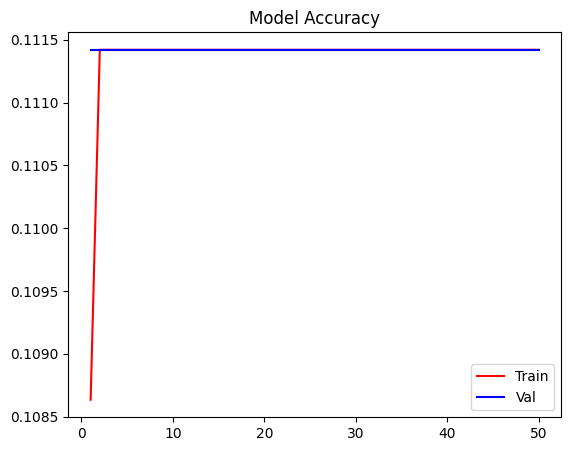

In [26]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

# Grafik Loss

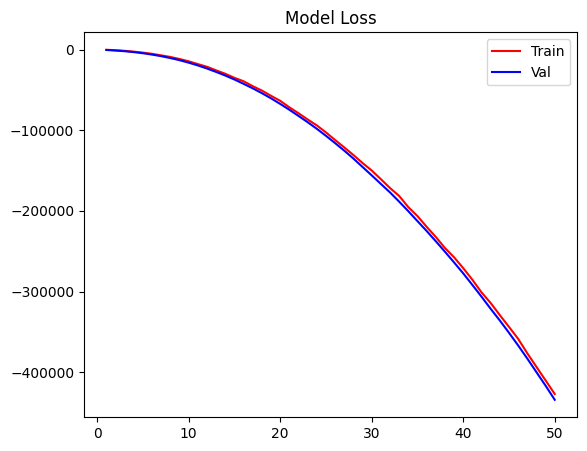

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()